## Analisis de datos de privacidad

## 1. Carga de librerías necesarias para implementación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

## 2. Cargar los datos

In [2]:
# Se cargan los datos. 
df_total=pd.read_excel('Privacy_MessaginApps.xlsx')

## 3. Perfilamiento, entendimiento y limpieza de los datos 

In [3]:
df_total.shape

(61, 20)

In [4]:
df_total.head()

,Age,App,OS,Platform has adds/Reads msg,Time with App,Updated version,Usage,Config auto-download,Blocked list,Notifications,Location,Anyone with your number,Add to group chat,Last Seen,Profile Photo,Status,Live Location,Read Receipts,Country,Gender
0,18-24,Apple Messaging,iOS,Probably not,More than 5 years,Yes,More than once a day,No,Yes,Yes,No,No,Does not really need to ask me before adding,Nobody,Nobody,Nobody,Nobody,Nobody,USA,Male
1,18-24,Apple Messaging,iOS,Might or might not,More than 5 years,Yes,More than once a day,I do not know,Yes,Yes,Yes,No,Definitely ask me before adding,Nobody,Everyone,Nobody,My Contacts,Everyone,USA,Male
2,25-30,Android Messaging,Android,Might or might not,2-3 years,Yes,Daily,I do not know,Yes,Yes,I do not know about this feature,No,Definitely ask me before adding,My app does not provide this feature,My app does not provide this feature,My app does not provide this feature,My app does not provide this feature,My app does not provide this feature,USA,Male
3,18-24,Apple Messaging,iOS,Probably not,4-5 years,Yes,More than once a day,I do not know,Yes,Yes,Yes,Maybe,Definitely ask me before adding,My app does not provide this feature,My app does not provide this feature,My app does not provide this feature,Nobody,Nobody,USA,Male
4,18-24,Discord,iOS,Might or might not,4-5 years,Yes,More than once a day,I do not know,Yes,Yes,No,No,Definitely ask me before adding,My app does not provide this feature,Everyone,Everyone,My app does not provide this feature,My app does not provide this feature,USA,Male


In [5]:
#Revisar el contenido de las variables que no son numéricas
df_total.describe()

,Age,App,OS,Platform has adds/Reads msg,Time with App,Updated version,Usage,Config auto-download,Blocked list,Notifications,Location,Anyone with your number,Add to group chat,Last Seen,Profile Photo,Status,Live Location,Read Receipts,Country,Gender
count,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
unique,4,9,3,5,6,3,4,4,4,2,3,4,4,7,6,6,6,6,6,4
top,18-24,Apple Messaging,iOS,Might or might not,More than 5 years,Yes,More than once a day,Yes,Yes,Yes,Yes,Yes,Definitely ask me before adding,My app does not provide this feature,My Contacts,My Contacts,Nobody,Nobody,USA,Male
freq,51,29,43,18,44,54,47,33,47,53,40,27,36,18,22,19,29,26,42,48


In [6]:
df = df_total.copy()
indexNames = df[df['Country'] != 'Colombia'].index
df = df.drop(indexNames)
df = df.drop('Country', 1)
df.head()

<ipython-input-6-c0f1861d9d69>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Country', 1)


,Age,App,OS,Platform has adds/Reads msg,Time with App,Updated version,Usage,Config auto-download,Blocked list,Notifications,Location,Anyone with your number,Add to group chat,Last Seen,Profile Photo,Status,Live Location,Read Receipts,Gender
26,25-30,WhatsApp,Android,Might or might not,More than 5 years,Yes,More than once a day,Yes,No,Yes,Yes,No,Definitely ask me before adding,Nobody,My Contacts,My Contacts,Nobody,Nobody,Male
27,18-24,WhatsApp,Android,Might or might not,More than 5 years,Yes,More than once a day,Yes,Yes,Yes,Yes,Yes,Ask me before adding only to specific groups,Nobody,My Contacts,My Contacts,Nobody,Everyone,Male
29,18-24,WhatsApp,Android,Probably not,More than 5 years,Yes,More than once a day,Yes,Yes,Yes,Yes,Yes,Ask me before adding only to specific groups,My Contacts,Everyone,Everyone,Nobody,My Contacts,Male
31,18-24,WhatsApp,iOS,Probably yes,More than 5 years,Yes,More than once a day,Yes,Yes,Yes,Yes,Yes,Definitely ask me before adding,Nobody,My Contacts,Everyone,Nobody,Everyone,Male
33,25-30,WhatsApp,Android,Definitely yes,More than 5 years,Yes,More than once a day,Yes,Yes,No,Yes,Yes,Does not really need to ask me before adding,Everyone,My Contacts,My Contacts,My Contacts,My Contacts,Male


### 4. Visualizar datos

In [8]:
df_trans = df.copy()
df_trans.columns

Index(['Age', 'App', 'OS', 'Platform has adds/Reads msg', 'Time with App',
       'Updated version', 'Usage', 'Config auto-download', 'Blocked list',
       'Notifications', 'Location', 'Anyone with your number',
       'Add to group chat', 'Last Seen', 'Profile Photo', 'Status',
       'Live Location', 'Read Receipts', 'Gender'],
      dtype='object')

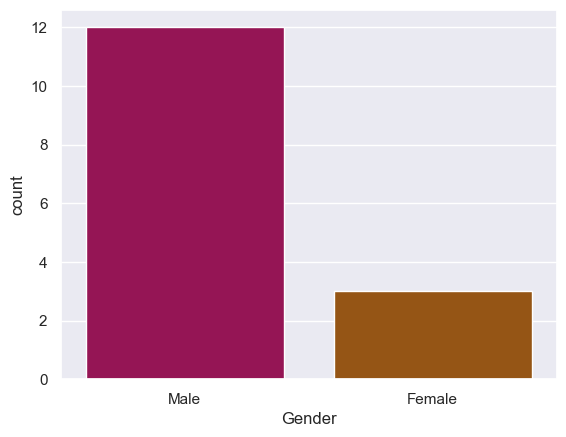

In [9]:
sns.countplot(x='Gender', data=df, palette="brg")
plt.show()

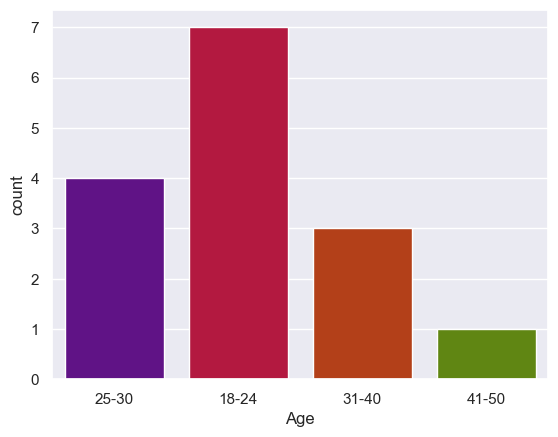

In [10]:
sns.countplot(x='Age', data=df, palette="brg")
plt.show()

In [11]:
print(df_trans['App'].value_counts())

WhatsApp    15
Name: App, dtype: int64


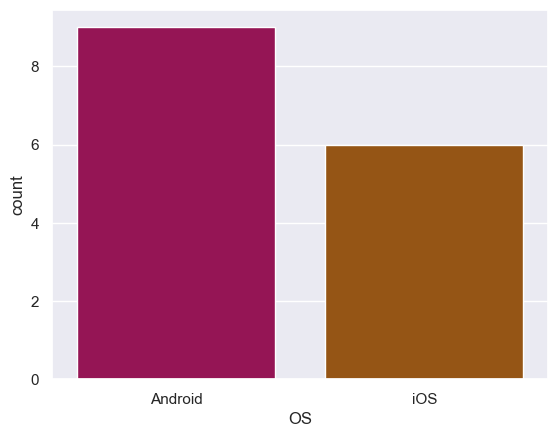

In [12]:
sns.countplot(x='OS', data=df, palette="brg")
plt.show()

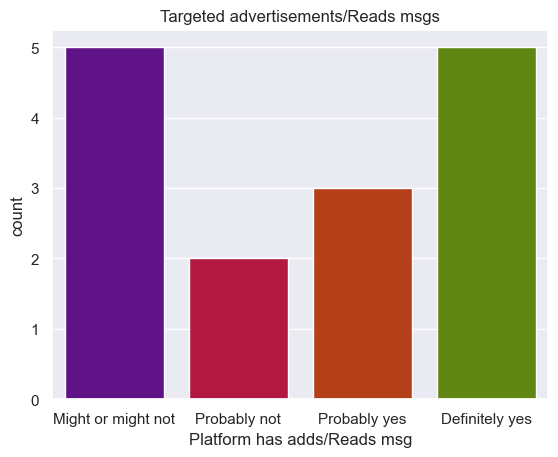

In [72]:
sns.countplot(x='Platform has adds/Reads msg', data=df, palette="brg").set(title="Targeted advertisements/Reads msgs")
plt.show()

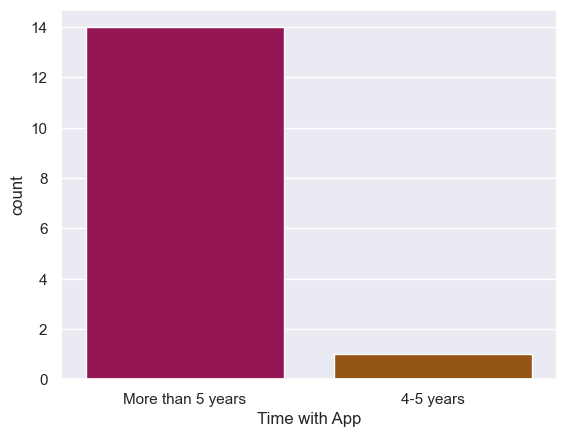

In [14]:
sns.countplot(x='Time with App', data=df, palette="brg")
plt.show()

In [15]:
print(df_trans['Updated version'].value_counts())

Yes    15
Name: Updated version, dtype: int64


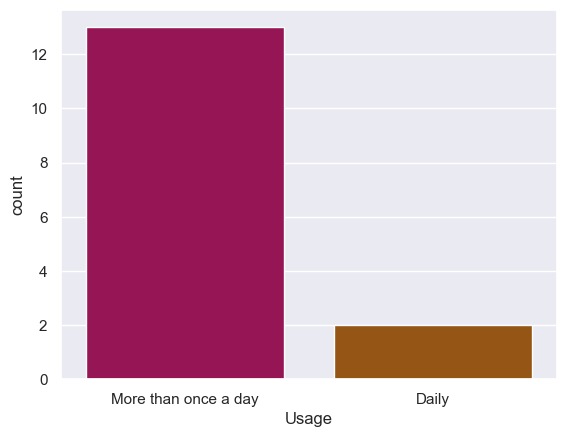

In [16]:
sns.countplot(x='Usage', data=df, palette="brg")
plt.show()

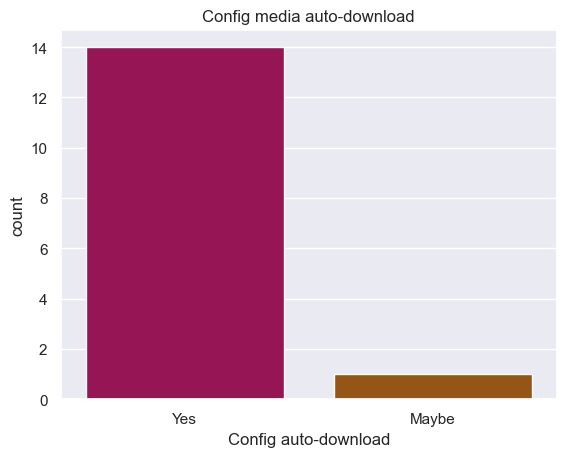

In [73]:
sns.countplot(x='Config auto-download', data=df, palette="brg").set(title="Config media auto-download")
plt.show()

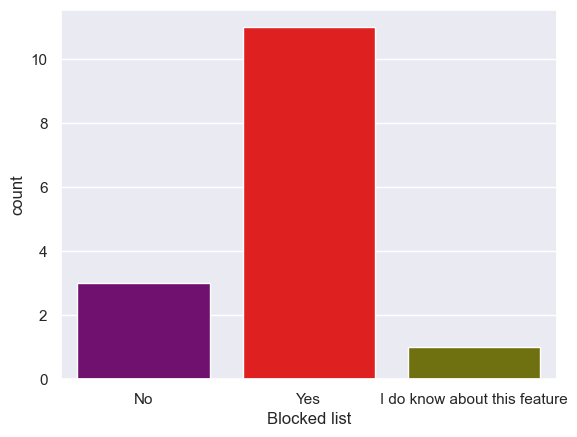

In [18]:
sns.countplot(x='Blocked list', data=df, palette="brg")
plt.show()

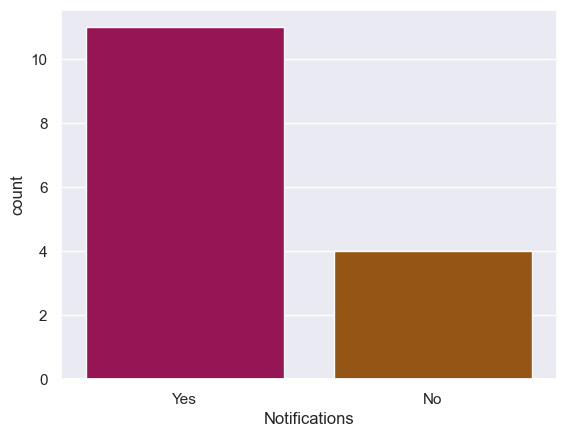

In [19]:
sns.countplot(x='Notifications', data=df, palette="brg")
plt.show()

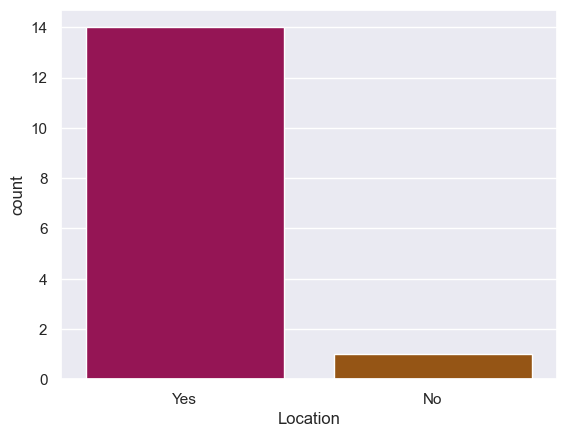

In [20]:
sns.countplot(x='Location', data=df, palette="brg")
plt.show()

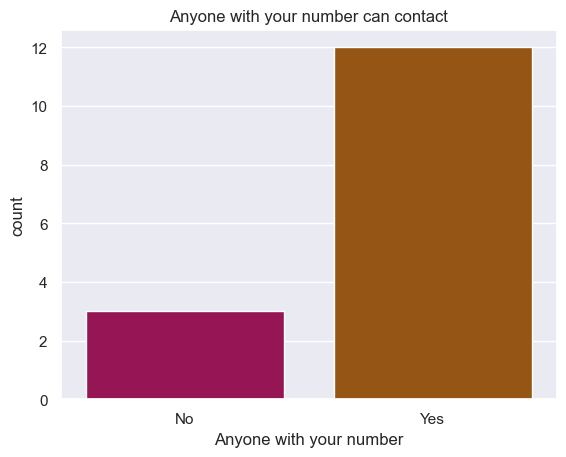

In [74]:
sns.countplot(x='Anyone with your number', data=df, palette="brg").set(title="Anyone with your number can contact")
plt.show()

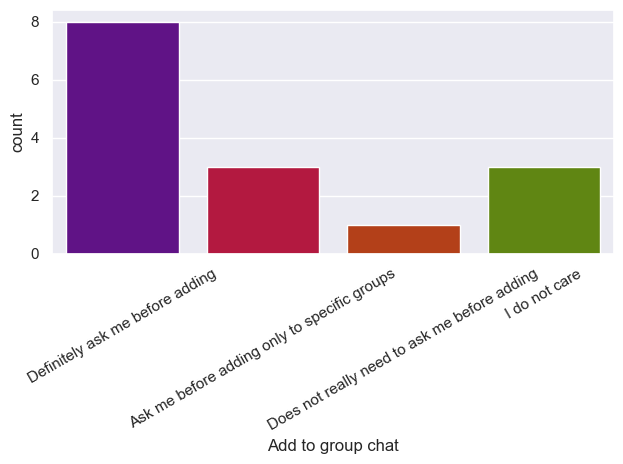

In [71]:
ax = sns.countplot(x='Add to group chat', data=df, palette="brg")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()

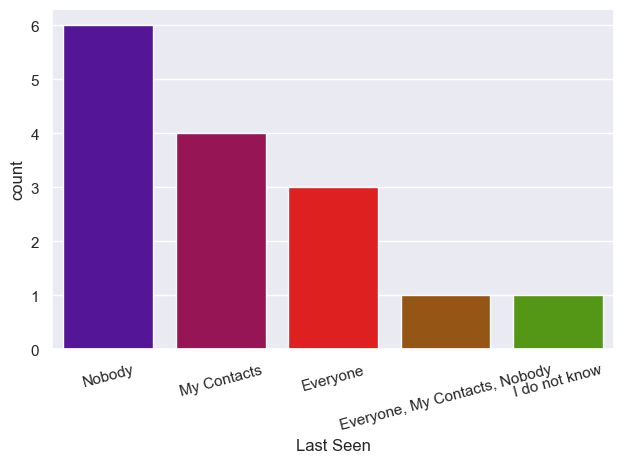

In [68]:
ax = sns.countplot(x='Last Seen', data=df, palette="brg")
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
plt.tight_layout()
plt.show()

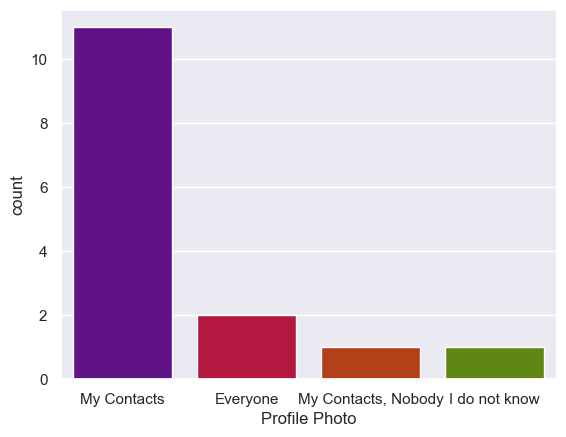

In [24]:
sns.countplot(x='Profile Photo', data=df, palette="brg")
plt.show()

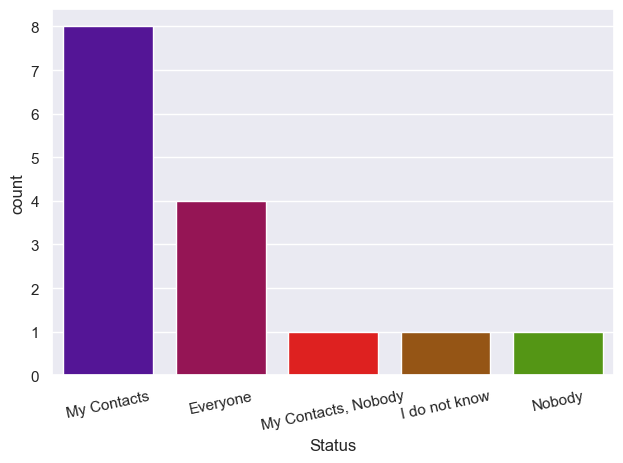

In [62]:
ax = sns.countplot(x='Status', data=df, palette="brg")
ax.set_xticklabels(ax.get_xticklabels(), rotation=12)
plt.tight_layout()
plt.show()

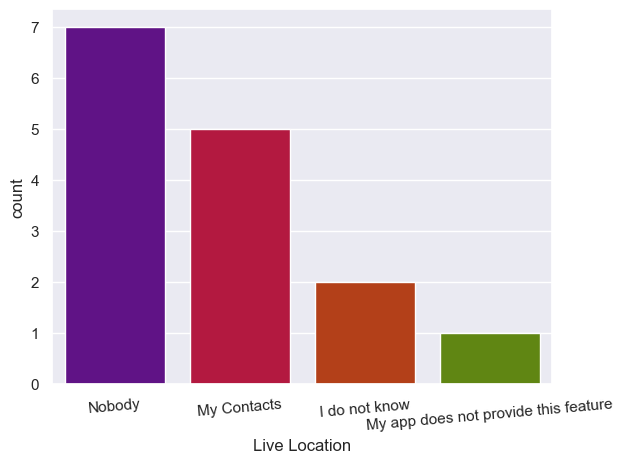

In [49]:
ax = sns.countplot(x='Live Location', data=df, palette="brg")
ax.set_xticklabels(ax.get_xticklabels(), rotation=5)
plt.tight_layout()
plt.show()

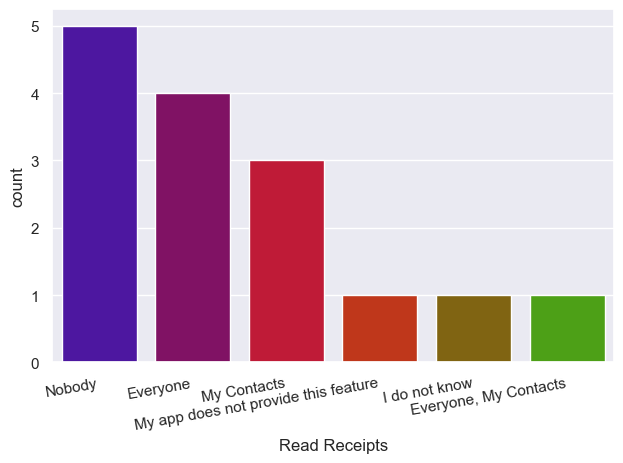

In [56]:
ax = sns.countplot(x='Read Receipts', data=df, palette="brg")
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.tight_layout()
plt.show()

# OPCIONES ADICIONALES

In [33]:
# Se decide agrupar datos similares.
df_trans['App'].replace({"Facebook Messaging": "Facebook Messenger"}, inplace=True)
df_trans['App'].replace({"Discord and messenger": "Facebook Messenger"}, inplace=True)
df_trans.App.value_counts()

Apple Messaging       29
WhatsApp              17
Android Messaging      5
Discord                4
Facebook Messenger     4
snapchat               1
Signal                 1
Name: App, dtype: int64

In [34]:
# Se transforman los datos categoricos
df_trans['App'] = LE.fit_transform(df_trans['App'])
df_trans.App.value_counts()

1    29
5    17
0     5
2     4
3     4
6     1
4     1
Name: App, dtype: int64